# Featuring Engineering

# Handling missing data

Handling missing data is a crucial step in the machine learning pipeline, as many machine learning algorithms cannot handle missing values directly. There are several strategies you can use to deal with missing data in Python for machine learning:

1. **Removing Rows or Columns**:
   - If the number of missing values is small and won't significantly impact the dataset, you can remove rows or columns with missing data using `dropna()` method from pandas.

   ```python
   import pandas as pd

   # Remove rows with missing values
   df.dropna(axis=0, inplace=True)

   # Remove columns with missing values
   df.dropna(axis=1, inplace=True)
   ```

2. **Imputation**:
   - Imputation involves filling in missing values with estimates. Some common methods for imputation include:
   
   a. **Mean/Median imputation**:
      - Replace missing values with the mean or median of the respective column.

      ```python
      df['column_name'].fillna(df['column_name'].mean(), inplace=True)
      ```

   b. **Mode imputation**:
      - Replace missing values with the mode (most frequent value) of the respective column.

      ```python
      df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)
      ```

   c. **Using custom imputation techniques**:
      - You can use more complex techniques like regression imputation or k-nearest neighbors imputation depending on your data.

3. **Forward Fill and Backward Fill**:
   - Sometimes, it's appropriate to fill missing values with the previous value (forward fill) or the next value (backward fill) in the same column.

   ```python
   df['column_name'].fillna(method='ffill', inplace=True)  # Forward fill
   df['column_name'].fillna(method='bfill', inplace=True)  # Backward fill
   ```

4. **Interpolation**:
   - Interpolation methods estimate missing values based on the values of neighboring data points. You can use pandas' `interpolate()` method for this.

   ```python
   df['column_name'] = df['column_name'].interpolate()
   ```

5. **Machine Learning-based Imputation**:
   - You can use machine learning models to predict missing values based on the other features. For example, you can train a regression model to predict missing values in a column based on the values of other columns.

   ```python
   from sklearn.linear_model import LinearRegression

   # Split the data into two sets: one with missing values and one without
   data_with_missing = df[df['column_name'].isna()]
   data_without_missing = df[~df['column_name'].isna()]

   # Train a model to predict missing values
   model = LinearRegression()
   model.fit(data_without_missing[['feature1', 'feature2']], data_without_missing['column_name'])

   # Predict missing values
   missing_values = model.predict(data_with_missing[['feature1', 'feature2']])

   # Fill in missing values
   df.loc[df['column_name'].isna(), 'column_name'] = missing_values
   ```

6. **Missing Data Indicators**:
   - Sometimes, it's valuable to create a binary indicator variable to denote whether a value was missing or not. This can be useful information for the model.

   ```python
   df['column_name_missing'] = df['column_name'].isna().astype(int)
   ```

Remember to choose the method that best suits your data and the specific problem you are trying to solve. Also, it's essential to evaluate the impact of missing data handling on your model's performance to ensure that it doesn't introduce bias or noise.

# Handling imbalanced datasets 

### Handling imbalanced datasets in machine learning is essential because many classification algorithms tend to perform poorly when one class is significantly more abundant than the other(s). This situation can lead to models that have a bias toward the majority class and perform poorly on the minority class. Here are some strategies to address class imbalance:

Upsampling and downsampling are techniques used to address class imbalance in machine learning by either increasing the number of instances in the minority class (upsampling) or reducing the number of instances in the majority class (downsampling). Python provides various libraries and functions to perform these operations. Let's explore both:

### Upsampling (Over-sampling):

1. **Using `sklearn`**:

   The `sklearn.utils.resample` function allows you to upsample the minority class. Here's an example:

   ```python
   from sklearn.utils import resample

   # Upsample the minority class
   df_minority = df[df['target_class'] == minority_class_label]
   df_majority = df[df['target_class'] == majority_class_label]

   df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

   # Combine the upsampled minority class with the majority class
   df_upsampled = pd.concat([df_majority, df_minority_upsampled])
   ```

2. **Using `imbalanced-learn` (SMOTE)**:

   The `imbalanced-learn` library provides more advanced upsampling techniques like Synthetic Minority Over-sampling Technique (SMOTE):

   ```python
   from imblearn.over_sampling import SMOTE

   smote = SMOTE(sampling_strategy='auto', random_state=42)
   X_resampled, y_resampled = smote.fit_resample(X, y)
   ```

### Downsampling (Under-sampling):

1. **Using `sklearn`**:

   The `sklearn.utils.resample` function can also be used for downsampling. Here's an example:

   ```python
   from sklearn.utils import resample

   # Downsample the majority class
   df_minority = df[df['target_class'] == minority_class_label]
   df_majority = df[df['target_class'] == majority_class_label]

   df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

   # Combine the downsampled majority class with the minority class
   df_downsampled = pd.concat([df_majority_downsampled, df_minority])
   ```

2. **Using `imbalanced-learn`**:

   `imbalanced-learn` also provides downsampling techniques like RandomUnderSampler:

   ```python
   from imblearn.under_sampling import RandomUnderSampler

   rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
   X_resampled, y_resampled = rus.fit_resample(X, y)
   ```

Make sure to replace `'target_class'`, `minority_class_label`, and `majority_class_label` with the appropriate column name and class labels from your dataset. Additionally, consider using cross-validation to evaluate the performance of your model after upsampling or downsampling to ensure it generalizes well to unseen data.

# SMOTE(Synthetic Minority Over-sampling Technique)
The above mentioned sampling Technics lacks varience so we are using smote which connects the nearest fata points and then it will be draw data points so varience will be increased but in up and down sampling the data points are crated on top of the same data point so the varience will be less

SMOTE, which stands for Synthetic Minority Over-sampling Technique, is a popular technique for addressing class imbalance in machine learning. It works by generating synthetic samples for the minority class to balance the class distribution. SMOTE does this by interpolating between the feature vectors of existing minority class instances. This technique helps prevent the model from being biased toward the majority class and can improve the overall performance of the model. Here's how SMOTE works:

1. **Select a Minority Sample**: SMOTE selects a random instance from the minority class.

2. **Find Nearest Neighbors**: It then identifies its k-nearest neighbors among the minority class instances. The value of "k" is a parameter you can specify.

3. **Generate Synthetic Samples**: SMOTE generates synthetic samples by randomly selecting one of the k-nearest neighbors and then creating a synthetic instance by linearly interpolating between the features of the selected instance and the randomly chosen neighbor. This interpolation is done for each feature.

4. **Repeat**: Steps 1 to 3 are repeated until the desired balance between the minority and majority classes is achieved.

SMOTE is available in Python through the `imbalanced-learn` library (imbalanced-learn is also known as imblearn). Here's how you can use SMOTE with Python:

```python
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can adjust 'sampling_strategy'

# Fit and transform your data
X_resampled, y_resampled = smote.fit_resample(X, y)
```

- `sampling_strategy`: This parameter allows you to specify how the synthetic samples should be generated. You can set it to `'auto'`, which will balance the classes automatically by generating enough synthetic samples to match the size of the majority class. Alternatively, you can set it to a specific number or a dictionary to specify the desired ratio.

- `random_state`: This parameter ensures reproducibility by fixing the random seed.

After resampling, you can use the `X_resampled` and `y_resampled` arrays in your machine learning model for training. SMOTE helps improve model performance, especially when dealing with imbalanced datasets, but it's essential to evaluate the model's performance using appropriate metrics such as precision, recall, F1-score, and area under the ROC curve (AUC-ROC) to ensure that the balance didn't introduce bias or other issues.

# Data Interpolation

Data interpolation is a technique used to estimate missing values in a dataset by filling in the gaps between known data points. It is commonly used in various fields, including time series analysis, geospatial data analysis, and data preprocessing for machine learning. Interpolation methods aim to make reasonable assumptions about the relationship between data points to provide estimates for missing values.

Here are some common interpolation methods in Python:

1. **Linear Interpolation**:

   Linear interpolation assumes that the relationship between data points is linear. It connects two known data points with a straight line and estimates the missing values along that line.

   ```python
   from scipy import interpolate

   x = [1, 2, 4, 7]
   y = [10, 15, None, 35]  # Missing value represented as None

   # Remove None values for interpolation
   x_clean = [xi for xi, yi in zip(x, y) if yi is not None]
   y_clean = [yi for yi in y if yi is not None]

   # Interpolate missing values
   f = interpolate.interp1d(x_clean, y_clean, kind='linear', fill_value='extrapolate')
   missing_value = f(4)  # Interpolate the missing value at x=4
   ```

2. **Polynomial Interpolation**:

   Polynomial interpolation fits a polynomial function to the data points. You can use the `numpy` library for polynomial interpolation:

   ```python
   import numpy as np

   x = [1, 2, 4, 7]
   y = [10, 15, None, 35]

   # Remove None values for interpolation
   x_clean = [xi for xi, yi in zip(x, y) if yi is not None]
   y_clean = [yi for yi in y if yi is not None]

   # Fit a polynomial of degree 2 (quadratic) to the data
   coefficients = np.polyfit(x_clean, y_clean, 2)

   # Create a polynomial function
   polynomial = np.poly1d(coefficients)

   # Interpolate missing value at x=4
   missing_value = polynomial(4)
   ```

3. **Spline Interpolation**:

   Spline interpolation uses piecewise-defined polynomials to interpolate data. The `scipy` library provides functions for spline interpolation:

   ```python
   from scipy.interpolate import interp1d

   x = [1, 2, 4, 7]
   y = [10, 15, None, 35]

   # Remove None values for interpolation
   x_clean = [xi for xi, yi in zip(x, y) if yi is not None]
   y_clean = [yi for yi in y if yi is not None]

   # Create a spline interpolation function
   f = interp1d(x_clean, y_clean, kind='cubic', fill_value='extrapolate')

   # Interpolate missing value at x=4
   missing_value = f(4)
   ```

4. **Time Series Interpolation**:

   For time series data, you can use specific time-based interpolation methods like linear interpolation or seasonal decomposition of time series (STL) to handle missing values in a way that considers the time dimension.

Remember that the choice of interpolation method depends on the nature of your data and the assumptions you are willing to make about the relationships between data points. Additionally, always be cautious when interpolating data and consider the potential impact on the quality and validity of your analysis or machine learning model.

# percentiles and Quartiles

Percentiles and quartiles are statistical measures used to describe the distribution of a dataset and identify key values that divide the data into different segments. They are particularly useful for understanding the spread and central tendency of a dataset. Here's an explanation of these terms:

1. **Percentiles**:
   
   - A percentile is a statistical measure used to describe the relative position of a particular data point within a dataset.

   - Percentiles are often expressed as a percentage and represent the percentage of data points that fall below a specific value.

   - The concept of percentiles is used to understand how data is distributed across a range and to identify outliers or extreme values.

   - The **kth percentile** is a value below which k% of the data falls.

   - Common percentiles include the 25th percentile (P25 or the first quartile), the 50th percentile (P50 or the median), and the 75th percentile (P75 or the third quartile).

   - Percentiles can be calculated using different methods, such as linear interpolation or nearest rank.

2. **Quartiles**:

   - Quartiles are a special case of percentiles that divide a dataset into four equal parts.

   - The **first quartile (Q1)**, also known as the 25th percentile, represents the value below which 25% of the data falls.

   - The **second quartile (Q2)**, also known as the 50th percentile, represents the median and is the value below which 50% of the data falls.

   - The **third quartile (Q3)**, also known as the 75th percentile, represents the value below which 75% of the data falls.

   - The **interquartile range (IQR)** is a measure of the spread of the middle 50% of the data and is calculated as Q3 - Q1. It is often used to identify outliers.

   - Quartiles are particularly useful for understanding the spread of data, detecting outliers, and creating box plots.

Here's how you can calculate quartiles and percentiles in Python using the `numpy` library:

```python
import numpy as np

data = [12, 15, 16, 20, 22, 23, 25, 26, 28, 30]

# Calculate quartiles
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)  # Median
q3 = np.percentile(data, 75)

# Calculate interquartile range (IQR)
iqr = q3 - q1

print("Q1 (25th percentile):", q1)
print("Median (50th percentile):", q2)
print("Q3 (75th percentile):", q3)
print("Interquartile Range (IQR):", iqr)
```

Understanding quartiles and percentiles can help you gain insights into the central tendency and variability of your data, as well as identify potential outliers or extreme values.

# 5 Number Summary

The "Five Number Summary" is a set of five statistical values that summarize the distribution of a dataset. These values provide a concise description of the dataset's central tendency, spread, and any potential outliers. The five numbers in the summary include:

1. **Minimum**:
   - The smallest value in the dataset, representing the lowest data point.

2. **First Quartile (Q1)**:
   - Also known as the 25th percentile, Q1 is the value below which 25% of the data falls.
   - It is the first quartile of the dataset when sorted in ascending order.

3. **Median (Q2)**:
   - The median is the middle value when the dataset is sorted.
   - It is also known as the 50th percentile and represents the value below which 50% of the data falls.

4. **Third Quartile (Q3)**:
   - Also known as the 75th percentile, Q3 is the value below which 75% of the data falls.
   - It is the third quartile of the dataset when sorted.

5. **Maximum**:
   - The largest value in the dataset, representing the highest data point.

The five-number summary is often used to create a visual representation of the data known as a "box plot" or "box-and-whisker plot." A box plot displays the five-number summary as a graphical representation of the dataset's distribution, making it easy to identify outliers and understand the spread and central tendency of the data.

Here's an example of how to calculate the five-number summary in Python using the `numpy` library:

```python
import numpy as np

data = [12, 15, 16, 20, 22, 23, 25, 26, 28, 30]

# Calculate the minimum and maximum
minimum = np.min(data)
maximum = np.max(data)

# Calculate quartiles
q1 = np.percentile(data, 25)
median = np.median(data)  # 50th percentile
q3 = np.percentile(data, 75)

print("Minimum:", minimum)
print("Q1 (25th percentile):", q1)
print("Median (50th percentile):", median)
print("Q3 (75th percentile):", q3)
print("Maximum:", maximum)
```

Understanding the five-number summary is valuable for summarizing and visualizing data, especially when you want to quickly assess the central tendency, spread, and potential outliers in a dataset.

# Box Plot

A box plot, also known as a box-and-whisker plot, is a graphical representation of a dataset's five-number summary (minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum). It is a useful tool for visualizing the distribution, spread, and presence of outliers in the data. Box plots are particularly effective for comparing the distributions of multiple datasets side by side.

Here's how to create a box plot in Python using the popular `matplotlib` library:

```python
import matplotlib.pyplot as plt

# Sample data
data = [12, 15, 16, 20, 22, 23, 25, 26, 28, 30]

# Create a box plot
plt.boxplot(data, vert=False)  # "vert=False" to create a horizontal box plot
plt.xlabel('Value')
plt.title('Box Plot')
plt.show()
```

In this example:
- `data` contains the dataset for which we want to create a box plot.
- `plt.boxplot()` is used to create the box plot. The `vert=False` argument is used to create a horizontal box plot; by default, it's a vertical box plot.
- `plt.xlabel()` and `plt.title()` are used to label the x-axis and provide a title for the plot.
- `plt.show()` is called to display the plot.

A box plot typically consists of the following components:

- **Box**: The box represents the interquartile range (IQR), which spans from the first quartile (Q1) to the third quartile (Q3). It contains 50% of the data.

- **Line (Whisker) Extending from the Box**: The lines (whiskers) extend from the box to the minimum and maximum values within a certain range. By default, the range is set to 1.5 times the IQR. Data points outside this range are considered outliers and are plotted individually as points.

- **Horizontal Line Inside the Box**: This line represents the median (Q2), which is the middle value of the dataset.

Box plots are helpful for quickly identifying whether a dataset is symmetrically distributed, whether it has outliers, and how the data is spread between quartiles. They are also useful for comparing the distributions of different datasets within the same plot, making them a powerful tool for data analysis and visualization.

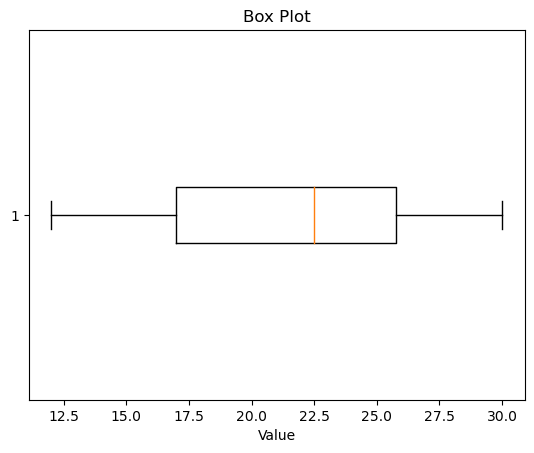

In [2]:
import matplotlib.pyplot as plt

# Sample data
data = [12, 15, 16, 20, 22, 23, 25, 26, 28, 30]

# Create a box plot
plt.boxplot(data, vert=False)  # "vert=False" to create a horizontal box plot
plt.xlabel('Value')
plt.title('Box Plot')
plt.show()
